<a href="https://colab.research.google.com/github/sebcalcagno/AnalisisSeriesTemporales/blob/main/CLASE_3/AST_Clase_3_ejercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales</h1>
    <h3>Clase 3</h3>
    <h3>Ejercicio 1</h3>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno / Fernando Martínez<p> 
</div>

In [ ]:
# !pip install pmdarima
# https://stackoverflow.com/questions/67601211/futurewarning-statsmodels-tsa-arima-model-arma-and-statsmodels-tsa-arima-model


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 3.8 MB/s 
     |████████████████████████████████| 9.8 MB 21.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_process import arma_generate_sample
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


from pmdarima.arima import auto_arima
plt.rcParams['figure.figsize'] = (10, 5)
from statsmodels.tsa.arima_process import ArmaProcess

MODELO MA

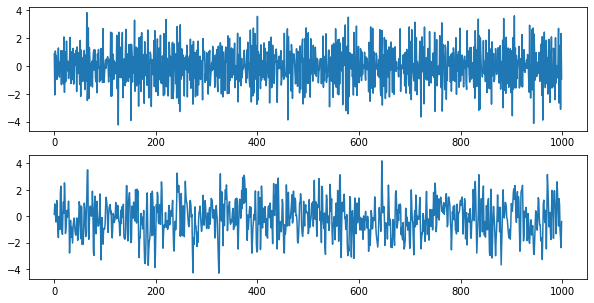

In [ ]:
# Grafico 1: MA parametro: -0.9
plt.subplot(2, 1, 1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
datos_simulados_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(datos_simulados_1);

# Grafico 2: MA parametro: +0.9
plt.subplot(2, 1, 2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2, ma2)
datos_simulados_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(datos_simulados_2);

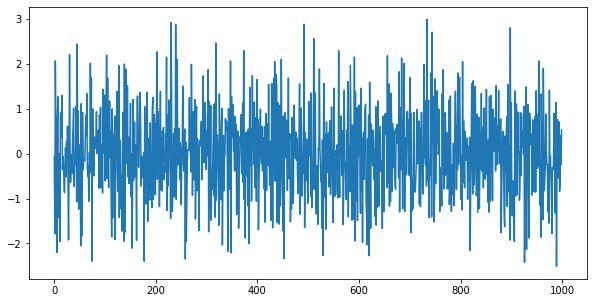

In [ ]:
# Grafico 3: MA parametro: -0.3
ar3 = np.array([1])
ma3 = np.array([1, -0.3])
MA_object3 = ArmaProcess(ar3, ma3)
datos_simulados_3 = MA_object3.generate_sample(nsample=1000)
plt.plot(datos_simulados_3);

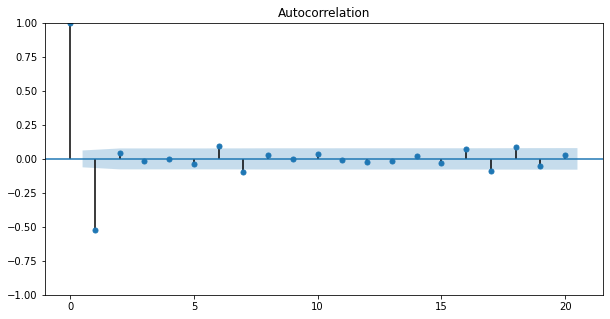

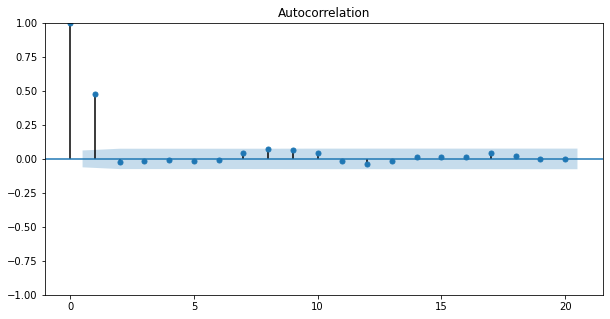

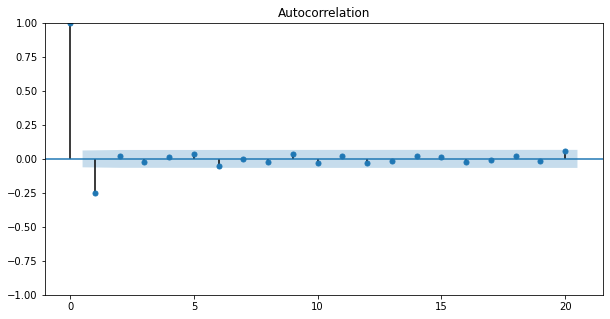

In [ ]:
# grafico ACF de los datos simulados 1: 
plot_acf(datos_simulados_1, lags=20);

# grafico ACF de los datos simulados 2: 
plot_acf(datos_simulados_2, lags=20);

# grafico ACF de los datos simulados 3: 
plot_acf(datos_simulados_3, lags=20);

Aqui vemos el modelo MA(1) de los simulados 1: 

In [ ]:
modelo1 = sm.tsa.arima.ARIMA(datos_simulados_1, order=(0,0,1))
resultado1 = modelo1.fit()

resultado1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1387.231
Date:                Thu, 07 Jul 2022   AIC                           2780.462
Time:                        03:44:43   BIC                           2795.185
Sample:                             0   HQIC                          2786.058
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0007      0.003     -0.240      0.810      -0.007       0.005
ma.L1         -0.9001      0.013    -67.075      0.000      -0.926      -0.874
sigma2         0.9370      0.041     22.727      0.000       0.856       1.018
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 5.99
Prob(Q):                              0.61   Prob(JB):                         0.05
Heteroskedasticity (H):               0.91   Skew:                            -0.18
Prob(H) (two-sided):                  0.40   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
stepwise_fit = auto_arima(datos_simulados_1, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2828.946, Time=0.67 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3408.116, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3121.297, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2823.121, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3406.119, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2825.038, Time=0.46 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2825.041, Time=0.52 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2827.115, Time=0.55 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2822.528, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2824.480, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2824.482, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3119.312, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2826.527, Time=0.21 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 3.359 seconds


# MODELO ARMA (P,Q)

- ARMA=
    - Autoregressive moving-average (ARMA) model
    - ARMA = AR + MA
        - ARMA(1, 1) model:
$$ y_t = a_1 y_{t-1} + m_1 \epsilon_{t-1} + \epsilon_t $$
        - ARMA(p, q) model:
            - p es el orden del componente AR 
            - q es el orden del componente MA 

ARMA (2,2)

In [ ]:
alphas = np.array([0.5, -0.25])
betas = np.array([0.5, -0.3])
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

In [ ]:
ARMA_2 = ArmaProcess(ar, ma).generate_sample(nsample=1000)


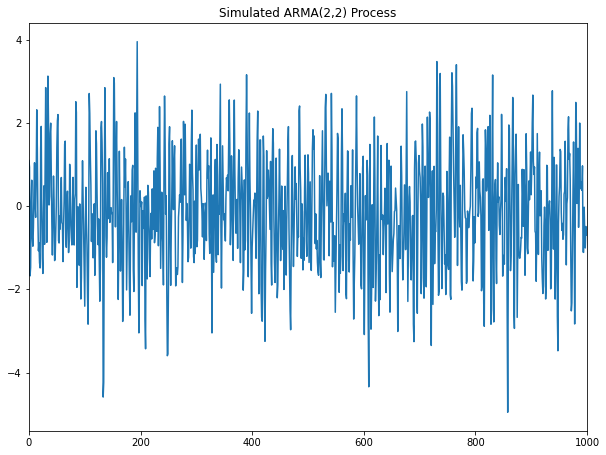

In [ ]:
plt.plot(ARMA_2)
plt.title("Simulated ARMA(2,2) Process")
plt.xlim([0, 1000])
plt.show()

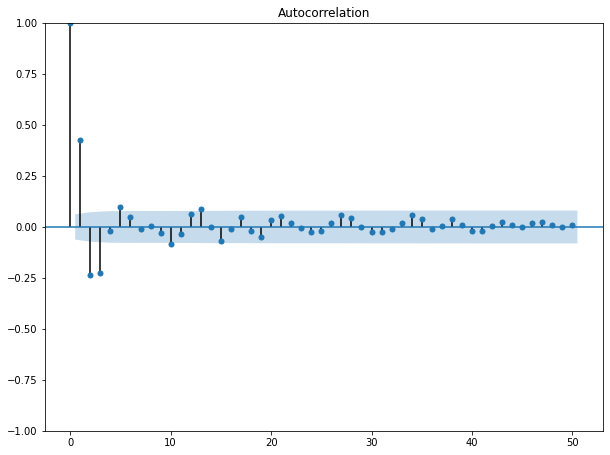

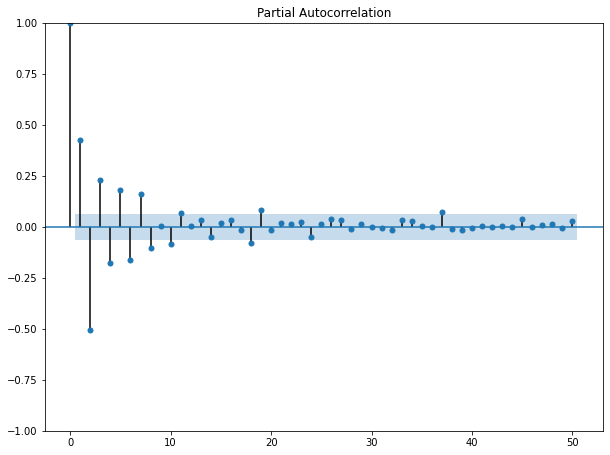

In [ ]:
plot_acf(ARMA_2, lags=50);
plot_pacf(ARMA_2, lags=50);

In [ ]:
modeloARMA = sm.tsa.arima.ARIMA(ARMA_2, order=(2,0,2))
resultadoARMA = modeloARMA.fit()

resultadoARMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1385.419
Date:                Fri, 08 Jul 2022   AIC                           2782.837
Time:                        15:54:51   BIC                           2812.284
Sample:                             0   HQIC                          2794.029
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1276      0.044     -2.929      0.003      -0.213      -0.042
ar.L1          0.4304      0.108      3.974      0.000       0.218       0.643
ar.L2         -0.2509      0.036     -6.938      0.000      -0.322      -0.180
ma.L1          0.4813      0.112      4.312      0.000       0.263       0.700
ma.L2         -0.3160      0.102     -3.087      0.002      -0.517      -0.115
sigma2         0.9335      0.042     22.238      0.000       0.851       1.016
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.05
Prob(Q):                              0.93   Prob(JB):                         0.98
Heteroskedasticity (H):               0.97   Skew:                            -0.02
Prob(H) (two-sided):                  0.80   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

💻 Fin del codigo.

20
